(EJUCOINTCIECOPI)=

# 3.3 Ejemplos de problemas UCO e introducción a *Constrained Inequality and Equality Convex Optimization* (CIECO) y puntos interiores

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion:2.1.4`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion).

```

---

Nota generada a partir de [liga1](https://www.dropbox.com/s/6isby5h1e5f2yzs/4.2.Problemas_de_optimizacion_convexa.pdf?dl=0), [liga2](https://drive.google.com/file/d/1zCIHNAxe5Shc36Qo0XjehHgwrafKSJ_t/view), [liga3](https://drive.google.com/file/d/12L7rOCgW7NEKl_xJbIGZz05XXVrOaPBz/view), [liga4](https://drive.google.com/file/d/1RMwUXEN_SOHKue-J9Cx3Ldvj9bejLjiM/view).

```{admonition} Al final de esta nota el y la lectora:
:class: tip

* 

* 

```

## Ejemplos problemas UCO

### Mínimos cuadrados

Obsérvese que hay una gran cantidad de modelos por mínimos cuadrados, por ejemplo:

* [Lineales](https://en.wikipedia.org/wiki/Linear_least_squares) u [ordinarios](https://en.wikipedia.org/wiki/Ordinary_least_squares) (nombre más usado en Estadística y Econometría).

* [Generalizados](https://en.wikipedia.org/wiki/Generalized_least_squares), [ponderados](https://en.wikipedia.org/wiki/Weighted_least_squares).

* [No lineales](https://en.wikipedia.org/wiki/Non-linear_least_squares).

* [Totales](https://en.wikipedia.org/wiki/Total_least_squares) y [parciales](https://en.wikipedia.org/wiki/Partial_least_squares_regression).

* [No negativos](https://en.wikipedia.org/wiki/Non-negative_least_squares).

* [Rango reducido](https://epubs.siam.org/doi/abs/10.1137/1.9780898718867.ch7).


### Mínimos cuadrados lineales

Se **asume** en esta sección que $A \in \mathbb{R}^{m \times n}$ con $m \geq n$ (más renglones que columnas en $A$).


Cada uno de los modelos anteriores tienen diversas aplicaciones y propósitos. Los lineales son un caso particular del problema más general de **aproximación por normas**:

$$\displaystyle \min_{x \in \mathbb{R}^n} ||Ax-b||$$

donde: $A \in \mathbb{R}^{m \times n}$, $b \in \mathbb{R}^m$ son datos del problema, $x \in \mathbb{R}^n$ es la variable de optimización y $|| \cdot||$ es una norma en $\mathbb{R}^m$. 



```{admonition} Definiciones

$x^* = \text{argmin}_{x \in \mathbb{R}^n} ||Ax-b||$ se le nombra **solución aproximada** de $Ax \approx b$ en la norma $|| \cdot ||$.

El vector: $r(x) = Ax -b$ se le nombra **residual** del problema.

```

```{admonition} Comentario

El problema de aproximación por normas también se le nombra **problema de regresión**. En este contexto, las componentes de $x$ son nombradas variables regresoras, las columnas de $A$ es un vector de *features* y el vector $\displaystyle \sum_{j=1}^n x_j^*a_j$ con $x^*$ óptimo del problema es nombrado la **regresión de $b$ sobre las regresoras**, $b$ es la **respuesta.**

```

Si en el problema de aproximación de normas anterior se utiliza la norma Euclidiana o norma $2$, $|| \cdot ||_2$, y se eleva al cuadrado la función objetivo se tiene:

$$\displaystyle \min_{x \in \mathbb{R}^n} ||Ax-b||^2_2$$

que es el modelo por mínimos cuadrados lineales cuyo objetivo es minimizar la suma de cuadrados de las componentes del residual $r(x)$.


**A partir de aquí, la variable de optimización será $\beta$ y no $x$**:

Supóngase que se han realizado mediciones de un fenómeno de interés en diferentes puntos $x_i$'s resultando en cantidades $y_i$'s $\forall i=0,1,\dots, m$ (se tienen $m+1$ puntos) y además las $y_i$'s contienen un ruido aleatorio causado por errores de medición:

<img src="https://dl.dropboxusercontent.com/s/iydpi0m8ndqzb0s/mcuadrados_1.jpg?dl=0" heigth="350" width="350">


El objetivo de los mínimos cuadrados es construir una curva, $f(x|\beta)$ que "mejor" se ajuste a los datos $(x_i,y_i)$, $\forall i=0,1,\dots,m$. El término de "mejor" se refiere a que la suma: 

$$\displaystyle \sum_{i=0}^m (y_i -f(x_i|\beta))^2$$ 


sea lo "más pequeña posible", esto es, a que la suma de las distancias verticales entre $y_i$ y $f(x_i|\beta)$ $\forall i=0,1,\dots,m$ al cuadrado sea mínima. Por ejemplo:

<img src="https://dl.dropboxusercontent.com/s/0dhzv336jj6ep4z/mcuadrados_2.jpg?dl=0" heigth="350" width="350">


```{admonition} Observación
:class: tip

La notación $f(x|\beta)$ se utiliza para denotar que $\beta$ es un vector de parámetros a estimar, en específico $\beta_0, \beta_1, \dots \beta_n$, esto es: $n+1$ parámetros a estimar.

```

### Modelo en mínimos cuadrados lineales

En los mínimos cuadrados lineales se asume un modelo:  

$$f(x|\beta) = \displaystyle \sum_{j=0}^n\beta_j\phi_j(x)$$

con $\phi_j: \mathbb{R} \rightarrow \mathbb{R}$ funciones conocidas por lo que se tiene una gran flexibilidad para el proceso de ajuste. Con las funciones $\phi_j (\cdot)$ se construye a la matriz $A$.

```{admonition} Observación
:class: tip

Si $n=m$ entonces se tiene un problema de interpolación.
```

Si $m=3$ y $A \in \mathbb{R}^{3 \times 2}$ geométricamente el problema de **mínimos cuadrados lineales** se puede visualizar con el siguiente dibujo:

<img src="https://dl.dropboxusercontent.com/s/a6pjx0pdqa3cp60/mc_beta.png?dl=0" heigth="400" width="400">


En el dibujo anterior:

* $r(\beta) = y-A\beta$,

* el vector $y \in \mathbb{R}^m$ contiene las entradas $y_i$'s,

* la matriz $A \in \mathbb{R}^{m \times n}$ contiene a las entradas $x_i$'s o funciones de éstas $\forall i=0,1,\dots,m$.

Por el dibujo se tiene que cumplir que $A^Tr(\beta)=0$, esto es: las columnas de $A$ son ortogonales a $r(\beta)$. La condición anterior conduce a las **ecuaciones normales**: 

$$0=A^Tr(\beta)=A^T(y-A\beta)=A^Ty-A^TA\beta.$$

donde: $A$ se construye con las $\phi_j$'s evaluadas en los puntos $x_i$'s, el vector $\beta$ contiene a los parámetros $\beta_j$'s a estimar y el vector $y$, la variable **respuesta**, se construye con los puntos $y_i$'s:

$$A = \left[\begin{array}{cccc}
\phi_0(x_0) &\phi_1(x_0)&\dots&\phi_n(x_0)\\
\phi_0(x_1) &\phi_1(x_1)&\dots&\phi_n(x_1)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_n) &\phi_1(x_n)&\dots&\phi_n(x_n)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_{m-1}) &\phi_1(x_{m-1})&\dots&\phi_n(x_{m-1})\\
\phi_0(x_m) &\phi_1(x_m)&\dots&\phi_n(x_m)
\end{array}
\right] \in \mathbb{R}^{(m+1)x(n+1)},
\beta=
\left[\begin{array}{c}
\beta_0\\
\beta_1\\
\vdots \\
\beta_n
\end{array}
\right] \in \mathbb{R}^n,
y=
\left[\begin{array}{c}
y_0\\
y_1\\
\vdots \\
y_m
\end{array}
\right] \in \mathbb{R}^{m + 1}
$$

Finalmente, considerando la variable de optimización $\beta$ y al vector $y$ tenemos: $A^TA \beta = A^Ty$.

```{admonition} Comentario

Si $A$ es de $rank$ completo (tiene $n+1$ columnas linealmente independientes) una opción para resolver el sistema anterior es calculando la factorización $QR$ de $A$: $A = QR$ y entonces: 


$$A^TA\beta = A^Ty$$. 


Dado que $A=QR$ se tiene: $A^TA = (R^TQ^T)(QR)$ y $A^T = R^TQ^T$ por lo que:

$$(R^TQ^T)(QR) \beta =  R^TQ^T y$$

y usando que $Q$ tiene columnas ortonormales:

$$R^TR\beta = R^TQ^Ty$$

Como $A$ tiene $n+1$ columnas linealmente independientes, la matriz $R$ es invertible por lo que $R^T$ también lo es y finalmente se tiene el **sistema de ecuaciones lineales** por resolver:

$$R\beta = Q^Ty$$
```

### Enfoque de optimización

La función objetivo en los mínimos cuadrados lineales puede escribirse de las siguientes formas:



$$
\begin{eqnarray}
f_o(\beta)=\displaystyle \sum_{i=1}^{m} (y_i -f_o(x_i|\beta))^2 &=&  \displaystyle \sum_{i=1}^{m} (y_i - A[i,:]^T\beta)^2 \\
&=& ||y - A \beta||_2^2 \\
&=& (y-A\beta)^T(y-A\beta) \\
&=& y^Ty-2\beta^TA^Ty + \beta^TA^TA\beta
\end{eqnarray}
$$

con $A[i,:]$ $i$-ésimo renglón de $A$ visto como un vector en $\mathbb{R}^n$. Es común dividir por $2$ la función objetivo para finalmente tener el problema:

$$\displaystyle \min_{\beta \in \mathbb{R}^n} \frac{1}{2}\beta^TA^TA\beta - \beta^TA^Ty + \frac{1}{2}y^Ty.$$


```{admonition} Observación
:class: tip

En cualquier reescritura de la función $f_o$, el problema de aproximación con normas, o bien en su caso particular de mínimos cuadrados, es un problema de **optimización convexa**.

```

### Ejemplo

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pprint

In [2]:
np.set_printoptions(precision = 2) #just two decimals

In [3]:
np.random.seed(1989) #for reproducibility
mpoints = 20
x = np.random.randn(mpoints) 
y = -3*x + np.random.normal(2,1,mpoints)

##### Los datos ejemplo

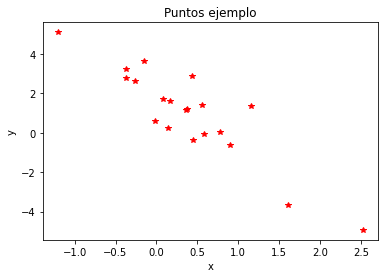

In [4]:
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()

Utilizamos el paquete [cvxpy](https://github.com/cvxgrp/cvxpy) para resolver el problema de mínimos cuadrados:

In [5]:
import cvxpy as cp

```{margin}

Construímos a la matriz $A$.

```

In [6]:
A=np.ones((mpoints,2)) #step 1 to build matrix A
A[:,1] = x #step 2 to build matrix A

```{margin}

Definición de variables y función objetivo: $\frac{1}{2}\beta^TA^TA\beta - \beta^TA^Ty + \frac{1}{2}y^Ty$.

```

In [7]:
n = 2 # number of variables
beta = cp.Variable(n) #optimization variable
fo_cvxpy = (1/2)*cp.quad_form(beta, A.T@A) - cp.sum(cp.multiply(A.T@y, beta)) + 1/2*y.dot(y) #objective function

In [9]:
prob = cp.Problem(cp.Minimize(fo_cvxpy))
print(prob.solve())

10.217738419387963


In [10]:
print("\nThe optimal value is", prob.value)
print("The optimal beta is")
print(beta.value)
print("The norm of the residual is ", cp.norm(A @ beta - y, p=2).value) #also works: cp.norm2(A @ beta - y).value



The optimal value is 10.217738419387963
The optimal beta is
[ 2.03 -2.65]
The norm of the residual is  4.520561562325624


El paquete *CVXPY* ya tiene una función para resolver el problema anterior, ver [least_squares](https://www.cvxpy.org/examples/basic/least_squares.html).

In [11]:
fo_cvxpy = 1/2*cp.sum_squares(A@beta -y)

In [12]:
prob = cp.Problem(cp.Minimize(fo_cvxpy))
print(prob.solve())

10.217738419387944


In [13]:
print("\nThe optimal value is", prob.value)
print("The optimal beta is")
print(beta.value)
print("The norm of the residual is ", cp.norm(A @ beta - y, p=2).value) #also works: cp.norm2(A @ beta - y).value



The optimal value is 10.217738419387944
The optimal beta is
[ 2.03 -2.65]
The norm of the residual is  4.520561562325624


### Regresión Logística

## Introducción a CIECO

### Componentes principales

### Máquina de Soporte Vectorial

## Puntos Interiores

**Referencias:**

1. S. P. Boyd, L. Vandenberghe, Convex Optimization, Cambridge University Press, 2009.

2. J. Dennis, R. B. Schnabel, Numerical Methods for Unconstrained Optimization and Nonlinear Equations, SIAM, 1996.

3. J. Nocedal, S. J. Wright, Numerical Optimization, Springer, 2006.